# <center>Network Science</center>

## <center>Home Assignment #3: Centralities and Assortativity</center>

### <center>Student: *IVANITSKIY ILYA*</center>

#### <hr /> General Information

## Problems

### Task 1

Compute degree centrality, Pagerank and  HubAuthorities scores for the [flickr](https://www.hse.ru/data/2016/02/24/1139618969/flickr.mat) network. 

Data contains sparse matrix A and list of user names.
This is a “denser” part of the Flickr photo sharing site friendship graph from 2006. Edge direction corresponds to friendship requests (following). Some of the links are reciprocal,others not.  

Provide top 50 names in each ranking, compare results

You can load .mat files with the following commands:

In [58]:
import scipy.io
data = scipy.io.loadmat('flickr.mat')

In [59]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os, gc, sys
import operator
%matplotlib inline

In [60]:
names = pd.Series(data['names'])
gr = nx.DiGraph(data['A'])

In [61]:
degree_centrality = nx.degree_centrality(gr)
in_degree_centrality = nx.in_degree_centrality(gr)
out_degree_centrality = nx.out_degree_centrality(gr)
pagerank = nx.pagerank(gr)
hubs, authorities = nx.hits(gr)

In [62]:
df = pd.DataFrame()
df['node'] = degree_centrality.keys()
df['degree_centrality'] = degree_centrality.values()
df['in_degree_centrality'] = in_degree_centrality.values()
df['out_degree_centrality'] = out_degree_centrality.values()
df['pagerank'] = pagerank.values()
df['authorities'] = authorities.values()
df['hubs'] = hubs.values()

In [63]:
df_degree_centrality = df.sort_values('degree_centrality',ascending=False)[:50]
df_in_degree_centrality = df.sort_values('in_degree_centrality',ascending=False)[:50]
df_out_degree_centrality = df.sort_values('out_degree_centrality',ascending=False)[:50]
df_pagerank = df.sort_values('pagerank',ascending=False)[:50]
df_hubs = df.sort_values('hubs',ascending=False)[:50]
df_authorities = df.sort_values('authorities',ascending=False)[:50]

In [64]:
df_all = pd.concat([df_authorities,df_degree_centrality,
                    df_in_degree_centrality,df_out_degree_centrality,
                    df_hubs,df_pagerank])
df_all = df_all.drop_duplicates()

In [65]:
def intersect_set(l1,l2):
    print(len(set(l1).intersection(set(l2))))

In [88]:
intersect_set(df_hubs.node,df_in_degree_centrality.node)
intersect_set(df_hubs.node,df_out_degree_centrality.node)
intersect_set(df_authorities.node,df_in_degree_centrality.node)
intersect_set(df_authorities.node,df_out_degree_centrality.node)

10
6
37
3


In [66]:
intersect_set(df_hubs.node,df_degree_centrality.node)
intersect_set(df_hubs.node,df_pagerank.node)
intersect_set(df_hubs.node,df_authorities.node)

11
11
11


In [67]:
intersect_set(df_authorities.node,df_degree_centrality.node)
intersect_set(df_authorities.node,df_pagerank.node)
intersect_set(df_authorities.node,df_hubs.node)

31
32
11


In [68]:
intersect_set(df_pagerank.node,df_degree_centrality.node)

42


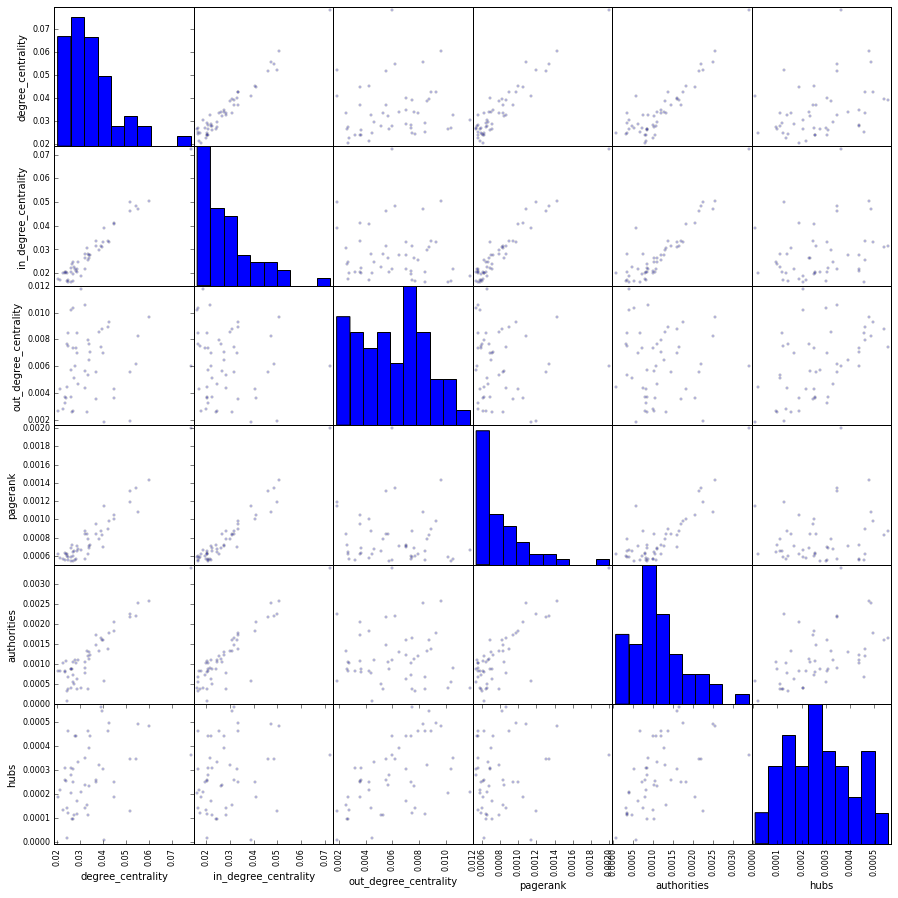

In [83]:
ax = pd.tools.plotting.scatter_matrix(df_pagerank[df_pagerank.columns[1:]],alpha=0.2,figsize=[15,15])

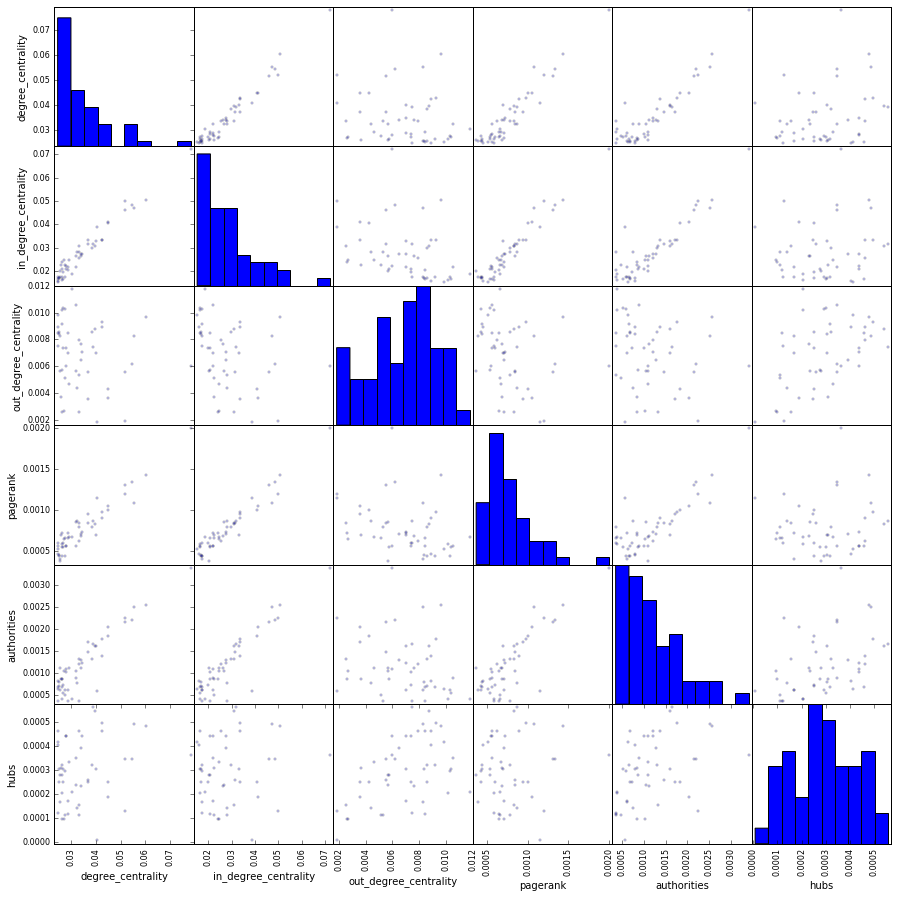

In [84]:
ax = pd.tools.plotting.scatter_matrix(df_degree_centrality[df_degree_centrality.columns[1:]],alpha=0.2,figsize=[15,15])

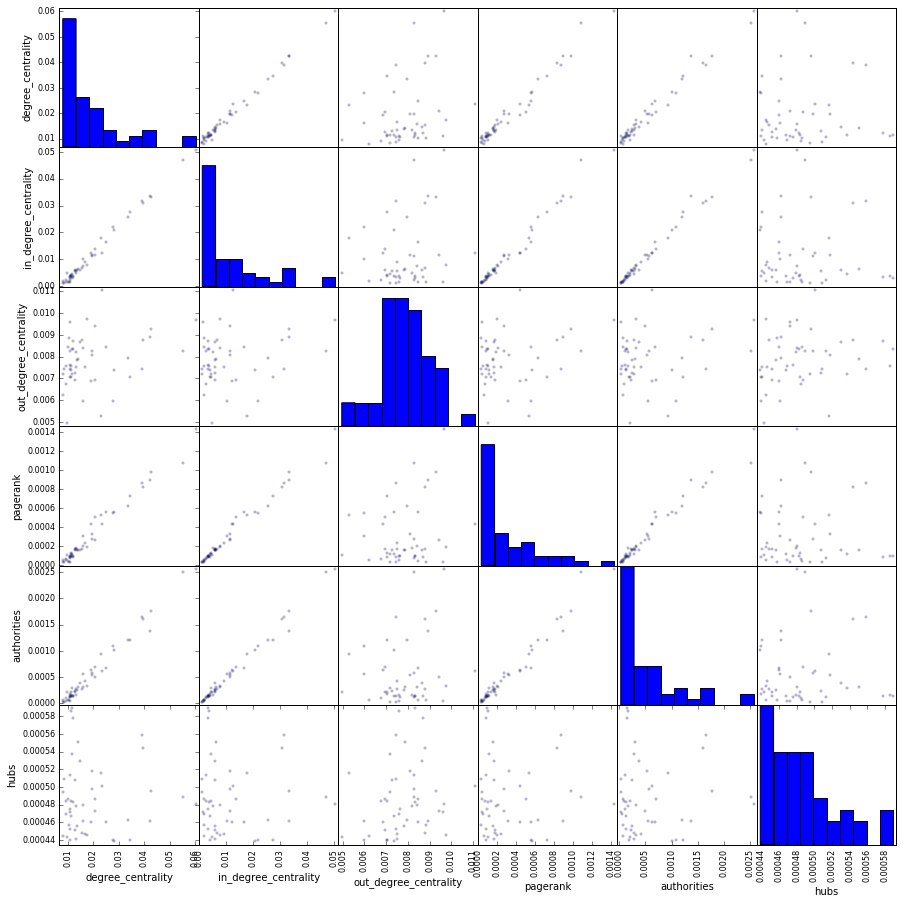

In [85]:
ax = pd.tools.plotting.scatter_matrix(df_hubs[df_hubs.columns[1:]],alpha=0.2,figsize=[15,15])

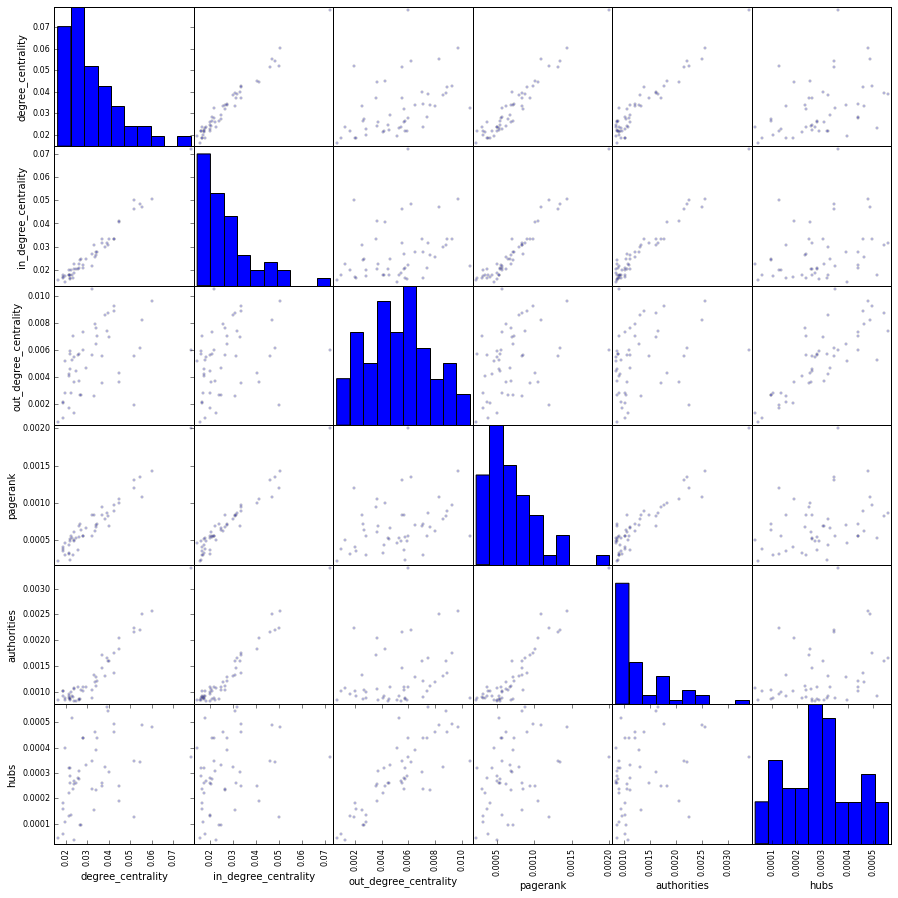

In [86]:
ax = pd.tools.plotting.scatter_matrix(df_authorities[df_authorities.columns[1:]],alpha=0.2,figsize=[15,15])

In [73]:
from scipy.stats.stats import pearsonr as prs

In [74]:
print(prs(df_all.degree_centrality,df_all.pagerank)[0])
print(prs(df_all.degree_centrality,df_all.hubs)[0])
print(prs(df_all.hubs,df_all.pagerank)[0])

0.961259598198
-0.202377289215
-0.264736727165


In [75]:
print(prs(df_all.degree_centrality,df_all.pagerank)[0])
print(prs(df_all.degree_centrality,df_all.authorities)[0])
print(prs(df_all.authorities,df_all.pagerank)[0])

0.961259598198
0.906218930448
0.874532018982


In [76]:
print(prs(df_all.authorities,df_all.hubs)[0])

-0.0798817547533


In [77]:
print(prs(df_all.in_degree_centrality,df_all.hubs)[0])
print(prs(df_all.in_degree_centrality,df_all.authorities)[0])
print(prs(df_all.out_degree_centrality,df_all.authorities)[0])
print(prs(df_all.out_degree_centrality,df_all.hubs)[0])

-0.277911030203
0.93317137161
-0.390744244981
0.409225680226


Исходя из всех вышеприведенных картинок, можно сказать, что корреляция достаточно высока между такими показателями, как:
- pagerank и degree centrality
- pagerank и authorities
- degree centrality и authorities

В тот же момент следует отметить, что показатель hubs слабо связан с остальными показателями.

Отчасти, это имеет некоторый социологический смысл:
В соцсети (а flicr, по сути, ей и является) часто существуют такие пользователи, которые крайне популярны (на них ссылается много других пользователей). Однако, число пользователей, которые являются хабами (т.е. собирают ссылки на крайне популярных пользователей) не так много, более того, редко хаб ссылается на большое количество хороших источников.

Более того, пересечение топ-50 взятых по определенным показателям составил:
- pagerank и degree centrality 31 элемент
- pagerank и authorities 32 элемента
- degree centrality и authorities 42 элемента
- in degree centrality и authorities 37 элементов
- out degree centrality и hubs 10 элементов

Пересечения топ-50 для out-degree centrality и authorities и in-degree centrality и hubs незначительное.

Малое пересечение out degree centrality и hubs обусловлено исключительно тем, что не любой хам, который ссылается на кучу нодов является хорошим хабом.

Топ-50 по показатель hubs с остальными показателями пересекается значительно слабее (порядка 8 элементов)

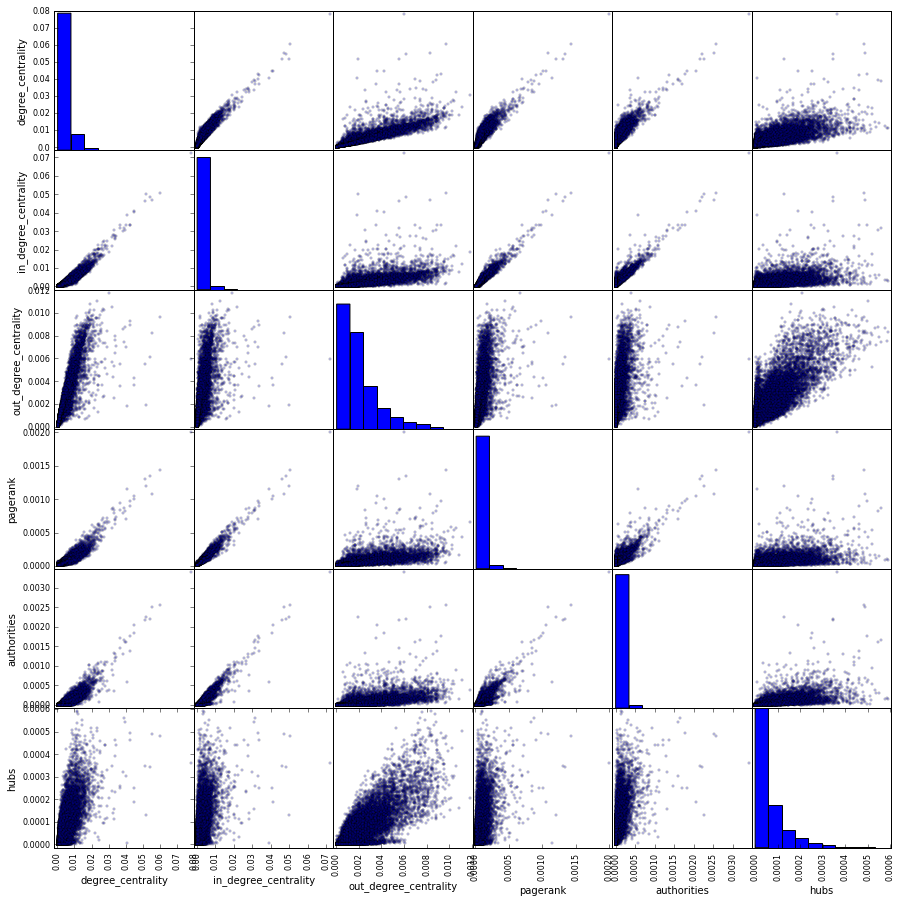

In [87]:
ax = pd.tools.plotting.scatter_matrix(df[df.columns[1:]],alpha=0.2,figsize=[15,15])

Картина (в случае, когда мы строим график не по топ-50 по каждому показателю, а по всем вершинам) меняется незначительно.
Видно, что более очевидная зависимость вышеперечисленных пар параметров начинается при значениях близких к максимальным по данному показателю.

In [79]:
names = names.to_frame().reset_index()

In [80]:
names.columns = ['node','node_name']

In [81]:
res = pd.merge(df_all, names, on = 'node')

Ниже приведем топ-5 по каждому из показателей:

In [82]:
h = 5
res_1 = res.sort_values('degree_centrality',ascending=False)[['node_name','degree_centrality']].head(h).reset_index(drop = True)
res_1.columns = ['nn1','degree_centrality']
res_2 = res.sort_values('pagerank',ascending=False)[['node_name','pagerank']].head(h).reset_index(drop = True)
res_2.columns = ['nn2','pagerank']
res_3 = res.sort_values('hubs',ascending=False)[['node_name','hubs']].head(h).reset_index(drop = True)
res_3.columns = ['nn3','hubs']
res_4 = res.sort_values('authorities',ascending=False)[['node_name','authorities']].head(h).reset_index(drop = True)
res_4.columns = ['nn4','authorities']
res_5 = res.sort_values('in_degree_centrality',ascending=False)[['node_name','in_degree_centrality']].head(h).reset_index(drop = True)
res_5.columns = ['nn5','in_degree_centrality']
res_6 = res.sort_values('out_degree_centrality',ascending=False)[['node_name','out_degree_centrality']].head(h).reset_index(drop = True)
res_6.columns = ['nn6','out_degree_centrality']
r = pd.concat([res_1,res_2,res_3,res_4,res_5,res_6],axis = 1)
r.index = range(1,h+1)
r

,nn1,degree_centrality,nn2,pagerank,nn3,hubs,nn4,authorities,nn5,in_degree_centrality,nn6,out_degree_centrality
1,awfulsara ...,0.078102,awfulsara ...,0.001996,mrpiink ...,0.000589,awfulsara ...,0.003397,awfulsara ...,0.072124,anildash ...,0.011766
2,drp ...,0.060230,drp ...,0.001431,automat ...,0.000586,drp ...,0.002560,drp ...,0.050563,tozzer ...,0.011067
3,DrJoanne ...,0.055333,antimethod ...,0.001341,schizoo23 ...,0.000578,DrJoanne ...,0.002507,*Ivan* ...,0.049990,AtiRanA ...,0.010812
4,antimethod ...,0.054506,BombDog ...,0.001308,lorrainemd ...,0.000559,*Ivan* ...,0.002246,antimethod ...,0.048337,pixietart ...,0.010558
5,*Ivan* ...,0.051898,*Ivan* ...,0.001197,sgoralnick ...,0.000551,antimethod ...,0.002201,DrJoanne ...,0.047065,jakedobkin ...,0.010367


### <hr /> Task 2

Here are the [Facebook friendship graphs](https://www.hse.ru/data/2016/03/05/1125656999/universities.zip) from several US universities from 2005 (one year after fb launch).

Data contains a A matrix (sparse) and a "local_info" variable, one row per node: 
a student/faculty status flag, gender, major, second major/minor (if applicable), dorm/house, year, and high school. 
Missing data is coded 0.

Compute node degree assortativity (mixining by node degree) and assortativity coefficient (modularity) for gender, major, dormitory, year, high school for all universities and compare the results.

In [94]:
ways = os.listdir('task2')
universities = {}
names = []
for path in ways:
    names.append(path.split('.')[0])
    #universities.update([(path.split('.')[0], scipy.io.loadmat('task2/'+path))])

In [36]:
universities_g = {}
universities_info = {}
for name in names:
    universities_g.update([(name, nx.DiGraph(universities[name]['A']))])
    universities_info.update([(name, universities[name]['local_info'])])

In [37]:
attrs = ['st/fac_flag','gender','major','2major','dorm','year','highS']

In [38]:
for name in names:
    j = 0
    G = universities_g[name]
    for attr in attrs:
        info_row = universities_info[name][:,j]
        info = { i:info_row[i] for i in range(len(info_row))}
        nx.set_node_attributes(G, attr, info)
        j = j + 1
    universities_g.update([(name, G)])

assortativity for node attributes

In [39]:
ass_c = {}
for name in names:
    temp_ass_c = {}
    for attr in attrs:
        temp_ass_c.update([(attr, nx.attribute_assortativity_coefficient(universities_g[name],attr))])
    ass_c.update([(name, temp_ass_c)])

degree assortativity of graph.

In [40]:
d_ass = {}
for name in names:
    d_ass.update([(name, nx.degree_assortativity_coefficient(universities_g[name]))])

In [104]:
df_d_ass = pd.DataFrame()
df_d_ass['university'] = d_ass.keys()
df_d_ass['degree_assortativity'] = d_ass.values()

In [95]:
col1 = []
col2 = []
col3 = []
for name in names:
    for attr in attrs:
        col3.append((ass_c[name])[attr])
        col1.append(name)
        col2.append(attr)
df = pd.DataFrame()
df['university'] = col1
df['property'] = col2
df['ass_coef'] = col3

In [101]:
df_g = pd.DataFrame(df.groupby('university')['ass_coef'].max()).merge(df,on = 'ass_coef')

### Таблица с различными assortiativity coefficient

In [108]:
df

,university,property,ass_coef
0,Berkeley13,st/fac_flag,0.274586
1,Berkeley13,gender,0.040923
2,Berkeley13,major,0.058255
3,Berkeley13,2major,0.016561
4,Berkeley13,dorm,0.147276
5,Berkeley13,year,0.308121
6,Berkeley13,highS,0.077375
7,Caltech36,st/fac_flag,0.244079
8,Caltech36,gender,0.046331
9,Caltech36,major,0.034719


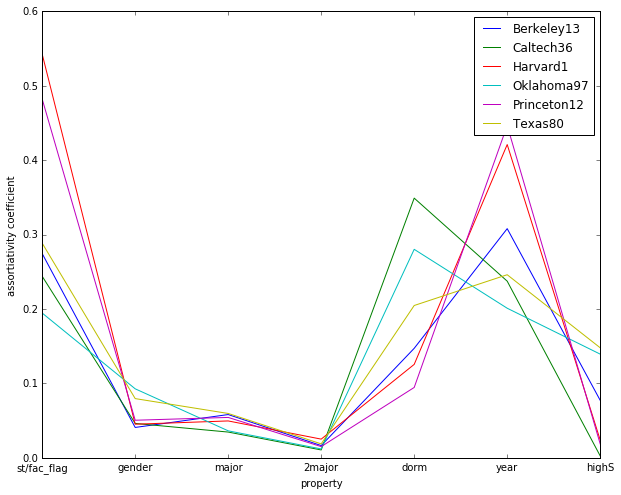

In [126]:
from matplotlib.ticker import FuncFormatter, MaxNLocator
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
def format_fn(tick_val, tick_pos):
    if int(tick_val) in xs:
        return labels[int(tick_val)]
    else:
        return ''

for i in names:
    ys = df['ass_coef'][df.university == i]
    xs = range(len(ys))
    labels = attrs
    ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.plot(xs, ys)
plt.xlabel('property')
plt.ylabel('assortiativity coefficient')
plt.legend(names)

    На представленном выше графике определенным цветом обозначен каждый университет. 
    По оси X представлены свойства студентов.
    По оси Y - коэффициент ассортиативности по каждому свойству по каждому университету.
    
    Можно сделать вывод, что некоторые свойства, например, *ПОЛ* никак не влияют на нахождение в схожих кластерах. Иначе говоря, если вы мальчик, то скорее всего у вас будут связи в социальной сети как с мальчиками, так и с девочками.

### В таблице ниже показаны свойства, которые дают для каждого университета максимум assortiativity coefficient (и значение degree assortativity)

In [106]:
df_g = df_g.merge(df_d_ass,on='university')

In [107]:
df_g

,ass_coef,university,property,degree_assortativity
0,0.308121,Berkeley13,year,0.010313
1,0.349153,Caltech36,dorm,-0.065273
2,0.542625,Harvard1,st/fac_flag,0.145055
3,0.280335,Oklahoma97,dorm,0.073673
4,0.482240,Princeton12,st/fac_flag,0.091092
5,0.288562,Texas80,st/fac_flag,0.163892


- Видно, что для большинства университетов основным свойством (свойством, относящимся к студенту), которое определяет адекватность разбиения студентов на группы с использованием этого самого свойства, является student/faculty status flag (судя по всему, принадлежность к тому же факультету) - Гарвард, Принстон и Техас - для этих вузов иные property дают меньший assortativity coef.
- На втором месте - принадлежность студентов к кампусу общежития (Оклахомский и Калтех). 
- В Беркли же - год рождения.

Также можно сказать, что количество связей между студентами в сообществе (степень вершины), не определяет группу (как множество студентов с определенным свойством) студентов - для каждого университета есть иное свойство студента, которое позволяет судить о его принадлежности какой-либо группе определяемой этим другим свойством. (см. на ячейку выше)